<a href="https://colab.research.google.com/github/dajebbar/FreeCodeCamp-python-data-analysis/blob/main/LogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od
import os

od.version()
url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'
od.download(url)


data_dir = 'weather-dataset-rattle-package'

os.listdir(data_dir)
train_csv = data_dir + '/weatherAUS.csv'

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno

plt.style.use('fivethirtyeight')
%matplotlib inline

In [5]:
raw_df = pd.read_csv(train_csv)
raw_df.sample(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
5360,2015-08-07,BadgerysCreek,0.3,16.6,0.0,NaN,NaN,SW,30.0,NNE,SSW,4.0,17.0,79.0,46.0,NaN,NaN,NaN,NaN,8.1,16.4,No,No
132445,2015-11-18,Hobart,12.2,22.7,0.0,5.4,7.9,NW,33.0,SE,E,20.0,19.0,59.0,64.0,1007.6,1008.4,2.0,1.0,17.1,18.0,No,No
136997,2011-07-15,AliceSprings,7.0,12.5,0.0,1.0,0.0,ESE,26.0,SE,E,11.0,17.0,95.0,71.0,1025.9,1022.5,8.0,8.0,8.9,12.2,No,No


In [6]:
target_column = 'RainTomorrow'
target = raw_df[target_column]
data_raw = raw_df.drop(target_column, axis=1)

In [7]:
data_raw.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


In [8]:
target.head()

0    No
1    No
2    No
3    No
4    No
Name: RainTomorrow, dtype: object

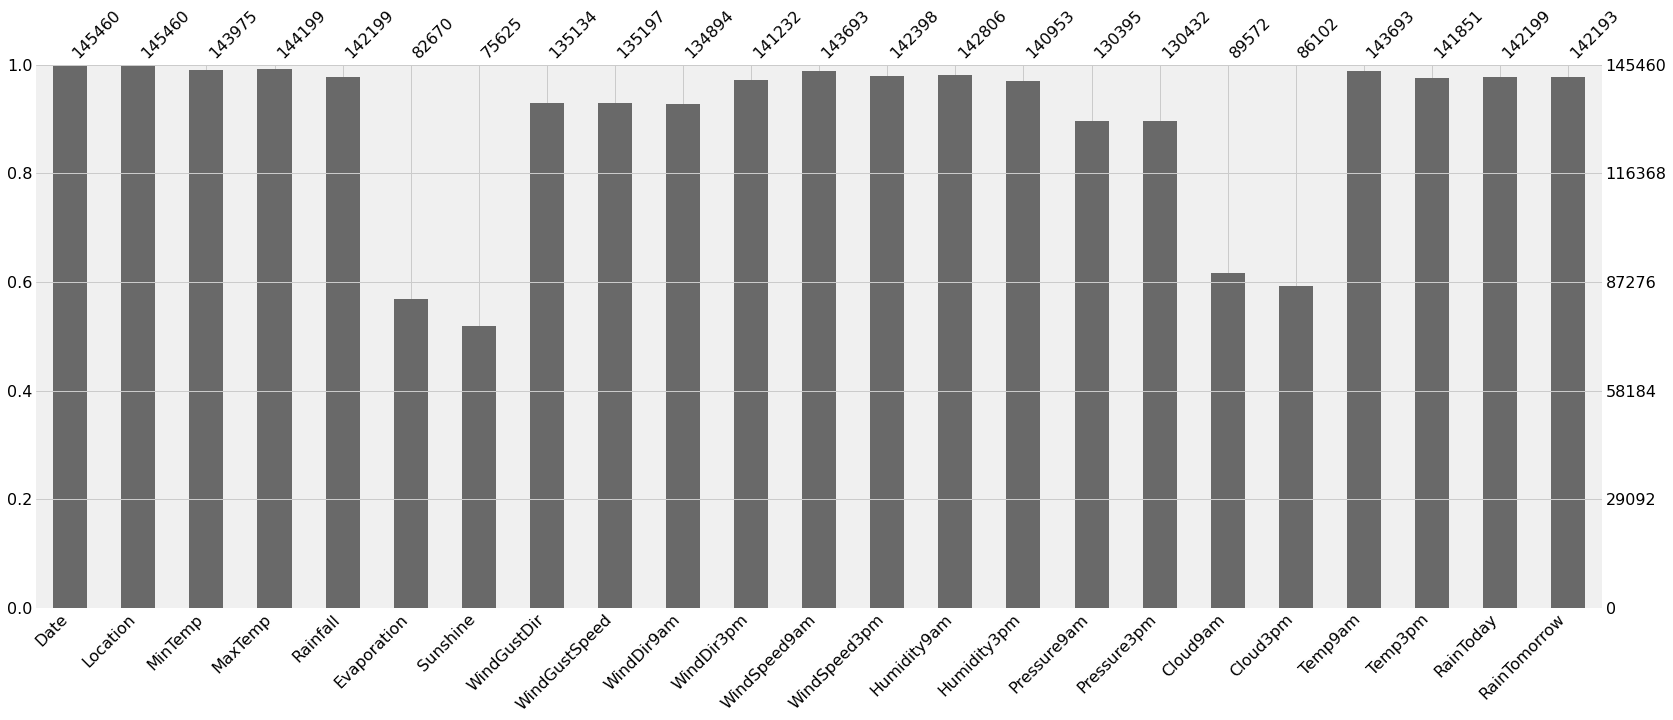

In [9]:
ax = msno.bar(raw_df)

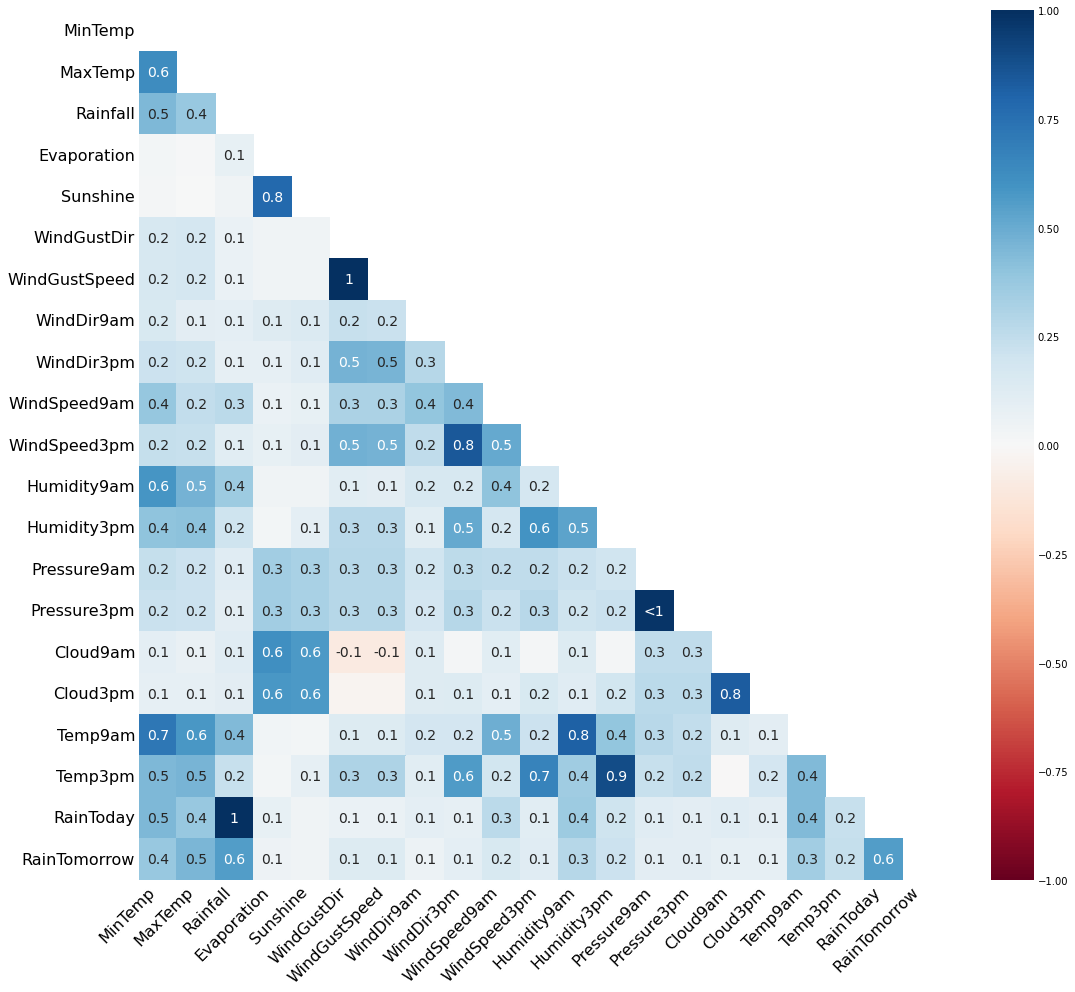

In [10]:
ax = msno.heatmap(raw_df, figsize=(16,16))

In [11]:
ax.get_figure().savefig('htmap.png')

- RainToday - Rainfall corr : 1
- Sunshine - Evaporation cor : 0.8
- WindGustSpeed - WindGustDir : <1
- WindSpeed3m -  WindDir3am: 0.8
- Temp9am - Humidity9pm : 0.8
- Temp3am - Humidity3am : 0.9
- Pressure3am - Pressure9am : <1
- cloud3pm -  cloud9pm: .8

In [12]:
from sklearn.compose import make_column_selector as selector
categorical_column = selector(dtype_include='object')(data_raw)
numerical_column = selector(dtype_exclude='object')(data_raw)


In [13]:
categorical_column

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [14]:
numerical_column

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [15]:
categorical_column = ['Date', 'Location','WindGustDir', 'WindDir9am', 
                      'WindDir3pm',  'RainToday']
numerical_column = ['MinTemp', 'MaxTemp', 'Sunshine', 'WindSpeed9am', 
                    'Pressure3pm', 'Temp9am', 'Temp3pm', 'Cloud3pm' ]

df = raw_df[categorical_column + numerical_column + [target_column]]
df.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,MinTemp,MaxTemp,Sunshine,WindSpeed9am,Pressure3pm,Temp9am,Temp3pm,Cloud3pm,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,13.4,22.9,NaN,20.0,1007.1,16.9,21.8,NaN,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,7.4,25.1,NaN,4.0,1007.8,17.2,24.3,NaN,No
2,2008-12-03,Albury,WSW,W,WSW,No,12.9,25.7,NaN,19.0,1008.7,21.0,23.2,2.0,No
3,2008-12-04,Albury,NE,SE,E,No,9.2,28.0,NaN,11.0,1012.8,18.1,26.5,NaN,No
4,2008-12-05,Albury,W,ENE,NW,No,17.5,32.3,NaN,7.0,1006.0,17.8,29.7,8.0,No


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f074f76ffd0>,
      dtype=object)

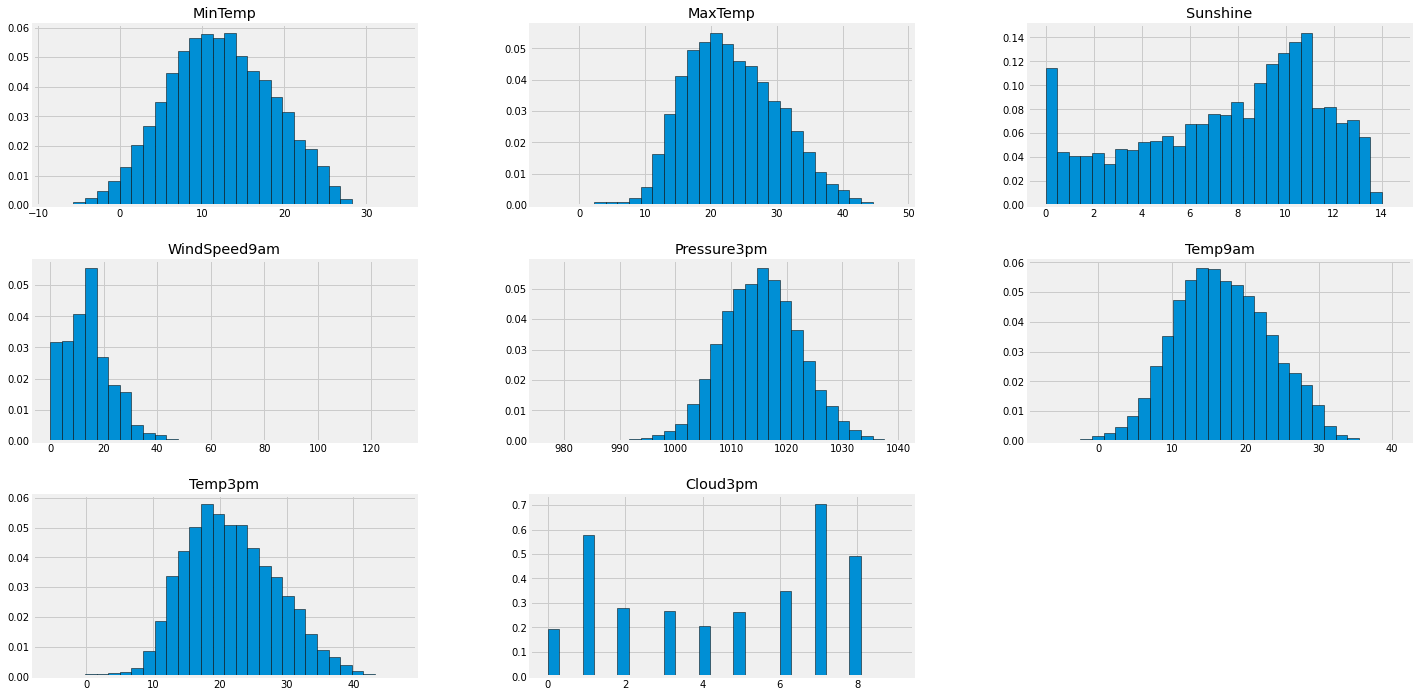

In [16]:
df.hist(figsize=(22, 12), bins=30, edgecolor="black", density=True)

Text(0.5, 1.0, 'Class distribution')

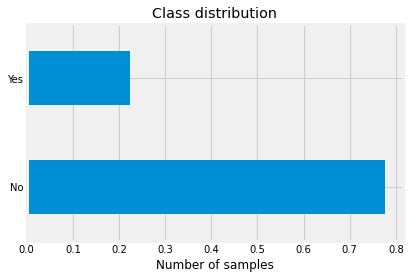

In [17]:
df.RainTomorrow.value_counts(normalize=True).plot.barh()
plt.xlabel('Number of samples')
plt.title('Class distribution')

In [18]:
raw_df.RainTomorrow.value_counts(dropna=False, normalize=True) * 100

No     75.839406
Yes    21.914616
NaN     2.245978
Name: RainTomorrow, dtype: float64

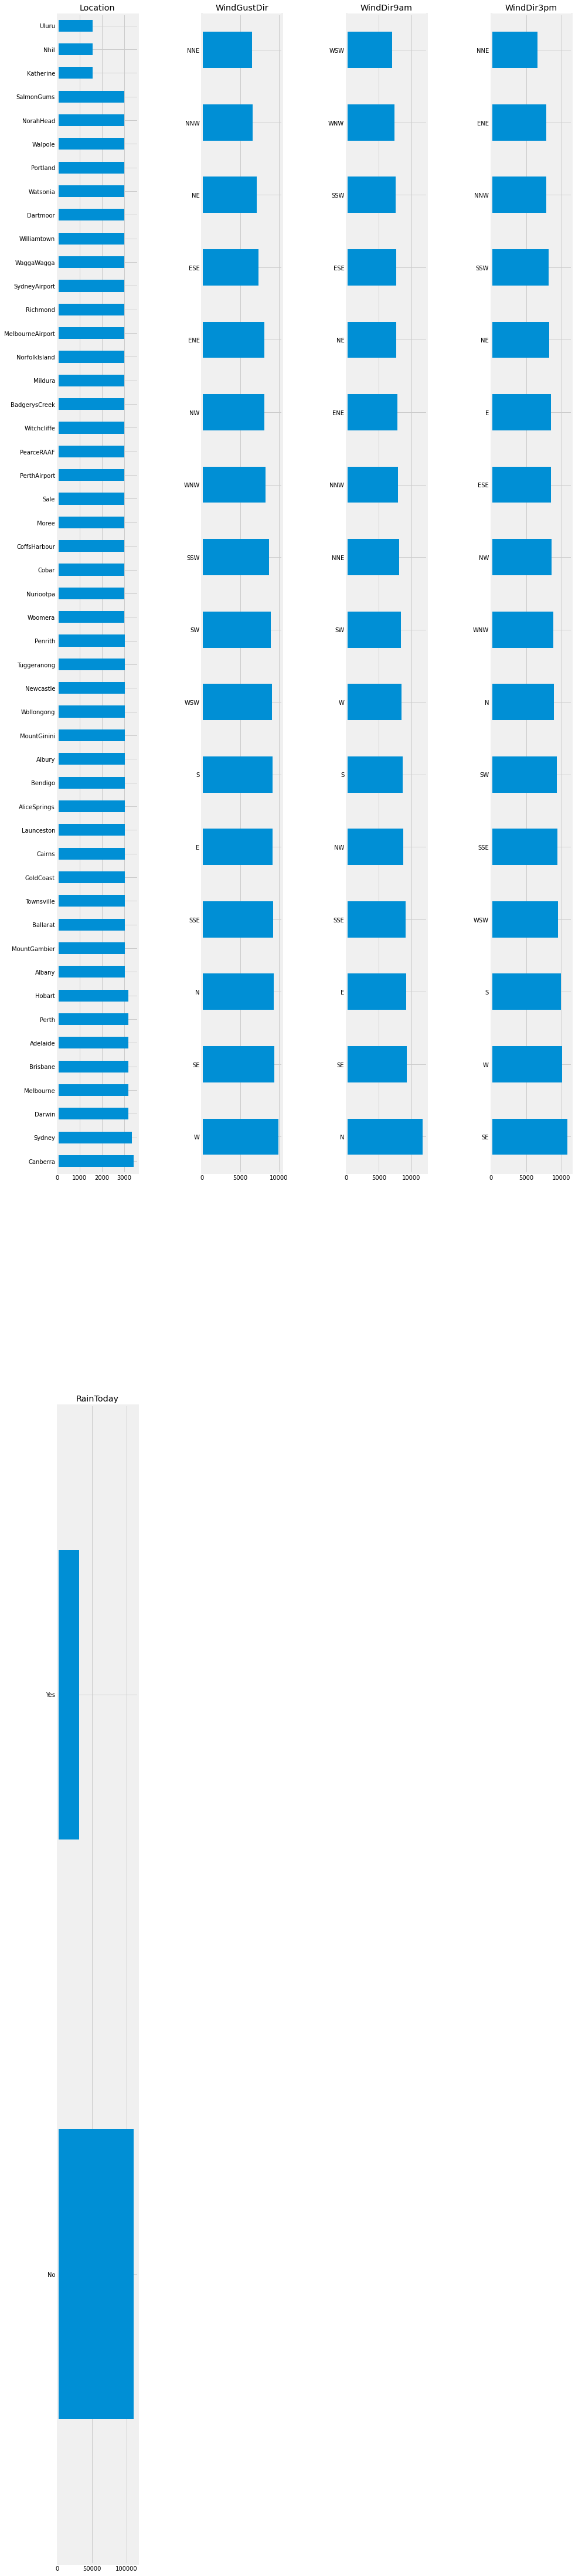

In [19]:
from math import ceil
from itertools import zip_longest

n_string_features = df[categorical_column[1:]].shape[1]
nrows, ncols = ceil(n_string_features / 4), 4

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(14, 80))

for feature_name, ax in zip_longest(df[categorical_column[1:]], axs.ravel()):
    if feature_name is None:
        # do not show the axis
        ax.axis("off")
        continue

    df[categorical_column[1:]][feature_name].value_counts().plot.barh(ax=ax)
    ax.set_title(feature_name)

plt.subplots_adjust(hspace=0.2, wspace=0.8)

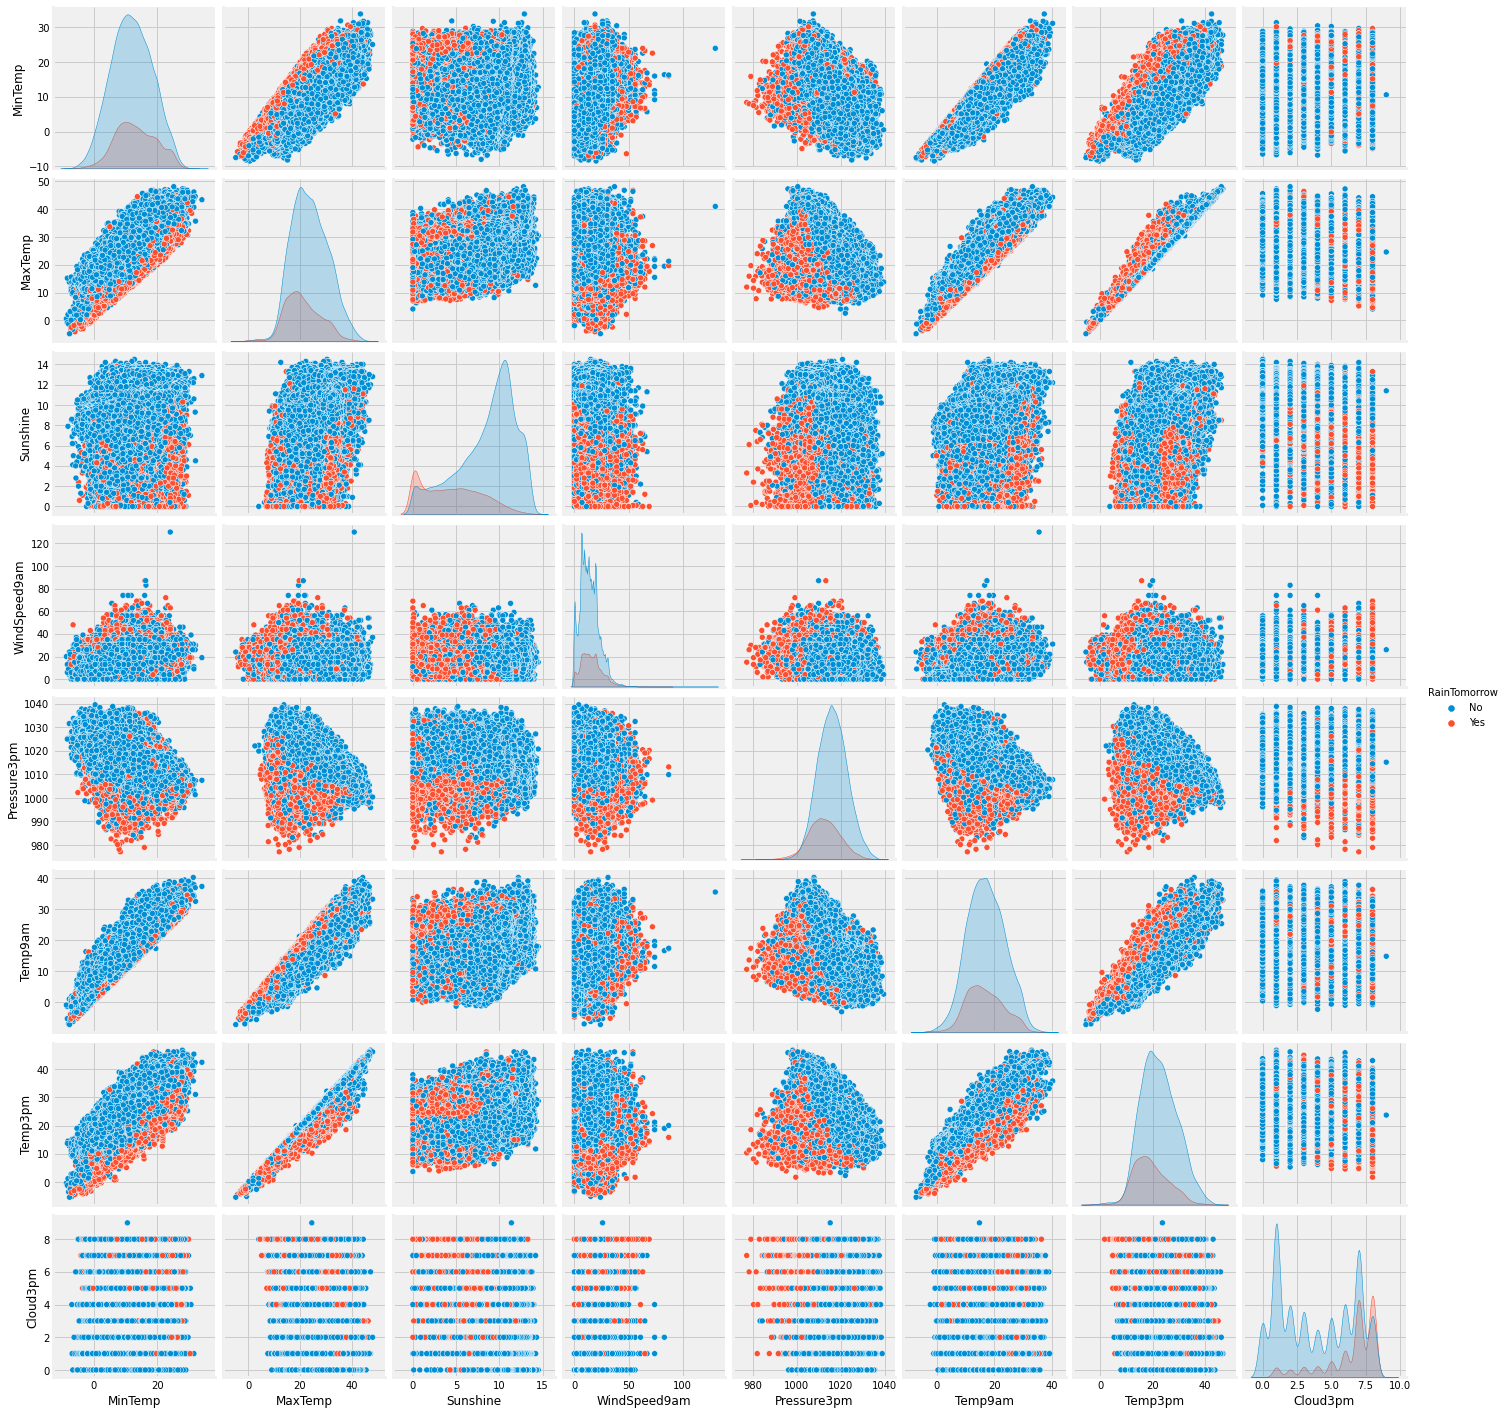

In [20]:
sns.pairplot(df, hue='RainTomorrow')

In [24]:
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [29]:
target_column = 'RainTomorrow'
target = df[target_column]
data = df.drop(target_column, axis=1)

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = Pipeline([
                                ('imputer', SimpleImputer(strategy='mean', 
                                                          fill_value=0)),
                                ('standard-scaler', StandardScaler())
])

categorical_transformer = Pipeline([
                                    ('imputer', 
                                     SimpleImputer(strategy='constant', 
                                                   fill_value='missing')),
                                    ('one-hot', 
                                     OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
                  ('num', numeric_transformer, numerical_column),
                  ('cat', categorical_transformer, categorical_column[1:])
    ],
    remainder='passthrough', sparse_threshold=0
)

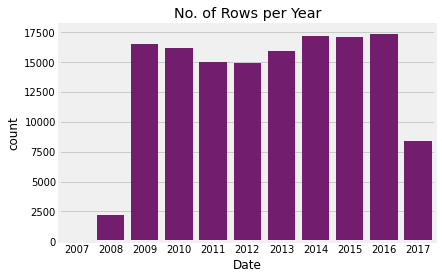

In [36]:
bar_col = sns.color_palette()[5]
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(data.Date).dt.year,
              color=bar_col);

In [38]:
print(numerical_column)
print(categorical_column)

['MinTemp', 'MaxTemp', 'Sunshine', 'WindSpeed9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Cloud3pm']
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [47]:
# data[year > 2015][numerical_column+categorical_column+[target_column]]

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV

year = pd.to_datetime(data.Date).dt.year

X_train = data[year > 2015][numerical_column+categorical_column[1:]]
X_test = data[year <= 2015][numerical_column+categorical_column[1:]]
# y_train = data[year > 2015]['target_column']
# y_test = data[year <= 2015]['target_column']


model = Pipeline([
                  ('preprocessor', preprocessor), 
                  ('classifier', LogisticRegression(max_iter=300))
])

In [34]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0)),
                                                                  ('standard-scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Sunshine', 'WindSpeed9am',
                                                   'Pressure3pm', 'Temp9am',
                                                   'Temp3pm', 'Cloud3pm']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                         